# Проект: Обучение с учителем: качество модели

### Техническое задание

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. 

Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

### План выполнения <a id='plan_global'></a>

1. [Изучение общей информации](#task_1) <a id='task_1_plan'></a>
    - Пропущенные значения
    - Неправильные типы данных


2. [Предобработка данных](#task_2) <a id='task_2_plan'></a>
    - [Замена названий и значений столбцов](#task_2_1) <a id='task_2_plan_1'></a>
    - [Изменение ошибочных значений](#task_2_2) <a id='task_2_plan_2'></a>
    - [Удаление возможных дубликатов](#task_2_3) <a id='task_2_plan_3'></a>


3. [Исследовательский анализ данных](#task_3) <a id='task_3_plan'></a>
    - [Статистический анализ количественных признаков таблицы 'market'](#task_3_1) <a id='task_3_plan_1'></a>
    - [Поиск выбросов количественных признаков таблицы 'market'](#task_3_2) <a id='task_3_plan_2'></a>
    - [Исследовательский анализ категориальных признаков таблицы 'market'](#task_3_3) <a id='task_3_plan_3'></a>
    - [Исследовательский анализ признаков таблицы 'market_money'](#task_3_4) <a id='task_3_plan_4'></a>
    - [Исследовательский анализ признаков таблицы 'market_time'](#task_3_5) <a id='task_3_plan_5'></a>
    - [Исследовательский анализ признаков таблицы 'money'](#task_3_6) <a id='task_3_plan_6'></a>
    - [Отбор клиентов с покупательской активностью не менее трёх месяцев](#task_3_7) <a id='task_3_plan_7'></a>


4. Объединение таблиц <a id='task_4_plan'></a>
    - Объединение таблиц **`market_file`**, **`market_money`**, **`market_time`**
    - Создание отдельных столбов с данными о выручке и времени на сайте для каждого периода


5. Корреляционный анализ
    - Взаимосвязь между признаками


6. Использование пайплайнов
    - Пайплайн для подготовки данных
    - Пайплайн для инициализации модели
    - Отбор лучшей модели для задачи классификации


7. Анализ важности признаков
    - Оценка важности признаков, построение графика важности с помощью метода SHAP
    - Выводы о значимости признаков


8. Сегментация покупателей
    - Выполнение сегментации покупателей, используя результаты моделирования и данные о прибыльности покупателей
    - Выбор группы покупателей. Предложение как увеличить её покупательскую активность
    - Выводы о сегментах


9. Общий вывод работы


### Описание данных

- **`market_file`** - данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении. <a id='market_file'></a>
    - `id` — номер покупателя в корпоративной базе данных.
    - `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    - `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
    - `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    - `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    - `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
    - `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    - `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    - `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
    - `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
    - `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
    - `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
    - `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


- **`market_money`** - данные о выручке, которую получает магазин с покупателя <a id='market_money'></a>
    - `id` — номер покупателя в корпоративной базе данных.
    - `Период` — название периода, во время которого зафиксирована выручка.
    - `Выручка` — сумма выручки за период.


- **`market_time`** - данные о времени (в минутах), которое покупатель провёл на сайте в течение периода. <a id='market_time'></a>
    - `id` — номер покупателя в корпоративной базе данных.
    - `Период` — название периода, во время которого зафиксировано общее время.
    - `минут` — значение времени, проведённого на сайте, в минутах.


- **`money`** - данные о среднемесячной прибыли продавца за последние 3 месяца <a id='money'></a>
    - `id` — номер покупателя в корпоративной базе данных.
    - `Прибыль` — значение прибыли.

In [632]:
# В дальнейшем поменять, добавить и структурировать!

import phik
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score, confusion_matrix 

### [Изучение общей информации](#task_1_plan) <a id='task_1'></a>

In [633]:
def parse_dataset(path, sep=','):
    df = pd.read_csv(path, sep=sep)

    display(df.head())
    
    print('\nПроцент пропусков')
    display((df.isna().mean()*100).sort_values(ascending=False))
    df.info()

    return df

In [634]:
def unique_category(df):
    for clmn in df.select_dtypes(exclude='number'):
        print(clmn+":", df[clmn].unique(), end='\n\n')

#### [Датасет market](#market_file)

In [635]:
try:
    market = parse_dataset('./datasets/market_file.csv')
except:
    market = parse_dataset('datasets/market_file.csv')

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2



Процент пропусков


id                                     0.0
Покупательская активность              0.0
Тип сервиса                            0.0
Разрешить сообщать                     0.0
Маркет_актив_6_мес                     0.0
Маркет_актив_тек_мес                   0.0
Длительность                           0.0
Акционные_покупки                      0.0
Популярная_категория                   0.0
Средний_просмотр_категорий_за_визит    0.0
Неоплаченные_продукты_штук_квартал     0.0
Ошибка_сервиса                         0.0
Страниц_за_визит                       0.0
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [636]:
unique_category(market)

Покупательская активность: ['Снизилась' 'Прежний уровень']

Тип сервиса: ['премиум' 'стандартт' 'стандарт']

Разрешить сообщать: ['да' 'нет']

Популярная_категория: ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']



1. Пропусков в таблице **`market`** не обнаружено
2. Явные неправильные типы данных отсутствуют
3. Бинарные категориальные признаки:
    - `Покупательская активность` (целевой)
    - `Тип сервиса`
    - `Разрешить сообщать`
4. Опечатки в категориальных признаках:
    - значение 'стандартт' в `Тип сервиса` следует заменить на 'стандарт'
5. Все столбцы стоит привести к стандартам оформления

#### [Датасет market_money](#market_money)

In [637]:
try:
    market_money = parse_dataset('./datasets/market_money.csv')
except:
    market_money = parse_dataset('datasets/market_money.csv')

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6



Процент пропусков


id         0.0
Период     0.0
Выручка    0.0
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [638]:
unique_category(market_money)

Период: ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']



1. Пропусков в таблице **`market_money`** не обнаружено
2. Явные неправильные типы данных отсутствуют
3. Все столбцы стоит привести к стандартам оформления

#### [Датасет market_time](#market_time)

In [639]:
try:
    market_time = parse_dataset('./datasets/market_time.csv')
except:
    market_time = parse_dataset('datasets/market_time.csv')

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13



Процент пропусков


id        0.0
Период    0.0
минут     0.0
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [640]:
unique_category(market_time)

Период: ['текущий_месяц' 'предыдцщий_месяц']



1. Пропусков в таблице **`market_time`** не обнаружено
2. Явные неправильные типы данных отсутствуют
3. Бинарные категориальные признаки:
    - `Период` 
4. Опечатки в категориальных признаках:
    - значение 'предыдцщий_месяц' в `Период` следует заменить на 'предыдущий_месяц'
5. Все столбцы стоит привести к стандартам оформления

#### [Датасет money](#money)

In [641]:
try:
    money = parse_dataset('./datasets/money.csv', sep=';')
except:
    money = parse_dataset('datasets/money.csv', sep=';')

,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"



Процент пропусков


id         0.0
Прибыль    0.0
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


1. Пропусков в таблице **`money`** не обнаружено
2. Столбец `Прибыль` имеет неправильный тип данных
3. Все столбцы стоит привести к стандартам оформления

#### Вывод по изучению общей информации

В таблицах отсутствуют пропуски. Столбец `Прибыль` из датасета **`money`** имеет неправильный тип данных. Бинарные признаки стоит перевести в float с значениями 1.0 и 0.0. \
Все столбцы необходимо привести в нижний змеиный регистр. 

- Опечатки в категориальных признаках:
    1. `market`: значение 'стандартт' в `Тип сервиса` следует заменить на 'стандарт'
    2. `market_time`: значение 'предыдцщий_месяц' в `Период` следует заменить на 'предыдущий_месяц'


<font size="2">[вернуться к плану выполнения](#plan_global)</font>

### [Предобработка данных](#task_2_plan) <a id='task_2'></a>

#### [Замена названий и значений столбцов](#task_2_plan_1) <a id='task_2_1'></a>

In [642]:
def get_columns(clm):
    return clm.lower().replace(" ", "_")

In [643]:
market.rename(columns=get_columns, inplace=True)
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

In [644]:
market_money.rename(columns=get_columns, inplace=True)
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [645]:
market_time.rename(columns=get_columns, inplace=True)
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [646]:
money.rename(columns=get_columns, inplace=True)
money['прибыль'] = money['прибыль'].apply(lambda x: float(x.replace(',', '.')))

money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Названия столбцов были приведены к нижнему змеиному регистру, согласно стандартам оформления. Тип данных столбца `прибыль` был изменен на float.

#### [Изменение ошибочных значений](#task_2_plan_2) <a id='task_2_2'></a>

In [647]:
market['тип_сервиса'].where(market['тип_сервиса'] != 'стандартт', 'стандарт', inplace=True)
market['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

Опечатка в датасете **`market`** в столбце `тип_сервиса` была исправлена с 'стандартт' на 'стандарт'.

In [648]:
market_time['период'].where(market_time['период'] != 'предыдцщий_месяц', 'предыдущий_месяц', inplace=True)
market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Опечатка в датасете **`market_time`** в столбце `период` была исправлена с 'предыдцщий_месяц' на 'предыдущий_месяц'.

#### [Удаление возможных дубликатов](#task_2_plan_3) <a id='task_2_3'></a>

In [649]:
market.duplicated(subset='id').sum()

0

В таблице **`market`**, с данными о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении, дубликаты отсутствуют.

In [650]:
market_money.duplicated().sum()

0

В таблице **`market_money`** каждый `id` встречается 3 раза, согласну столбцу `период` ('препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц') \
Явные дубликаты отсутствуют

In [651]:
market_time.duplicated().sum()

0

В таблице **`market_time`** каждый `id` встречается 2 раза, согласну столбцу `период` ('текущий_месяц', 'предыдущий_месяц') \
Явные дубликаты отсутствуют

In [652]:
money.duplicated().sum()

0

В таблице **`money`** дубликаты отсутствуют

#### Вывод предобработки данных

1. Названия столбцов были приведены к нижнему змеиному регистру, согласно стандартам оформления
2. Опечатки в датасетах `market`, `market_time` были исправлены
3. Дубликаты в таблицах отсутствуют

<font size="2">[вернуться к плану выполнения](#plan_global)</font>

### [Исследовательский анализ данных](#task_3_plan) <a id='task_3'></a>

#### [Статистический анализ количественных признаков таблицы 'market'](#task_3_plan_1) <a id='task_3_1'></a>

In [653]:
round(market.iloc[:, 1:].describe(), 2)

,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00
mean,4.25,4.01,601.90,0.32,3.27,2.84,4.19,8.18
std,1.01,0.70,249.86,0.25,1.36,1.97,1.96,3.98
min,0.90,3.00,110.00,0.00,1.00,0.00,0.00,1.00
25%,3.70,4.00,405.50,0.17,2.00,1.00,3.00,5.00
50%,4.20,4.00,606.00,0.24,3.00,3.00,4.00,8.00
75%,4.90,4.00,806.00,0.30,4.00,4.00,6.00,11.00
max,6.60,5.00,1079.00,0.99,6.00,10.00,9.00,20.00


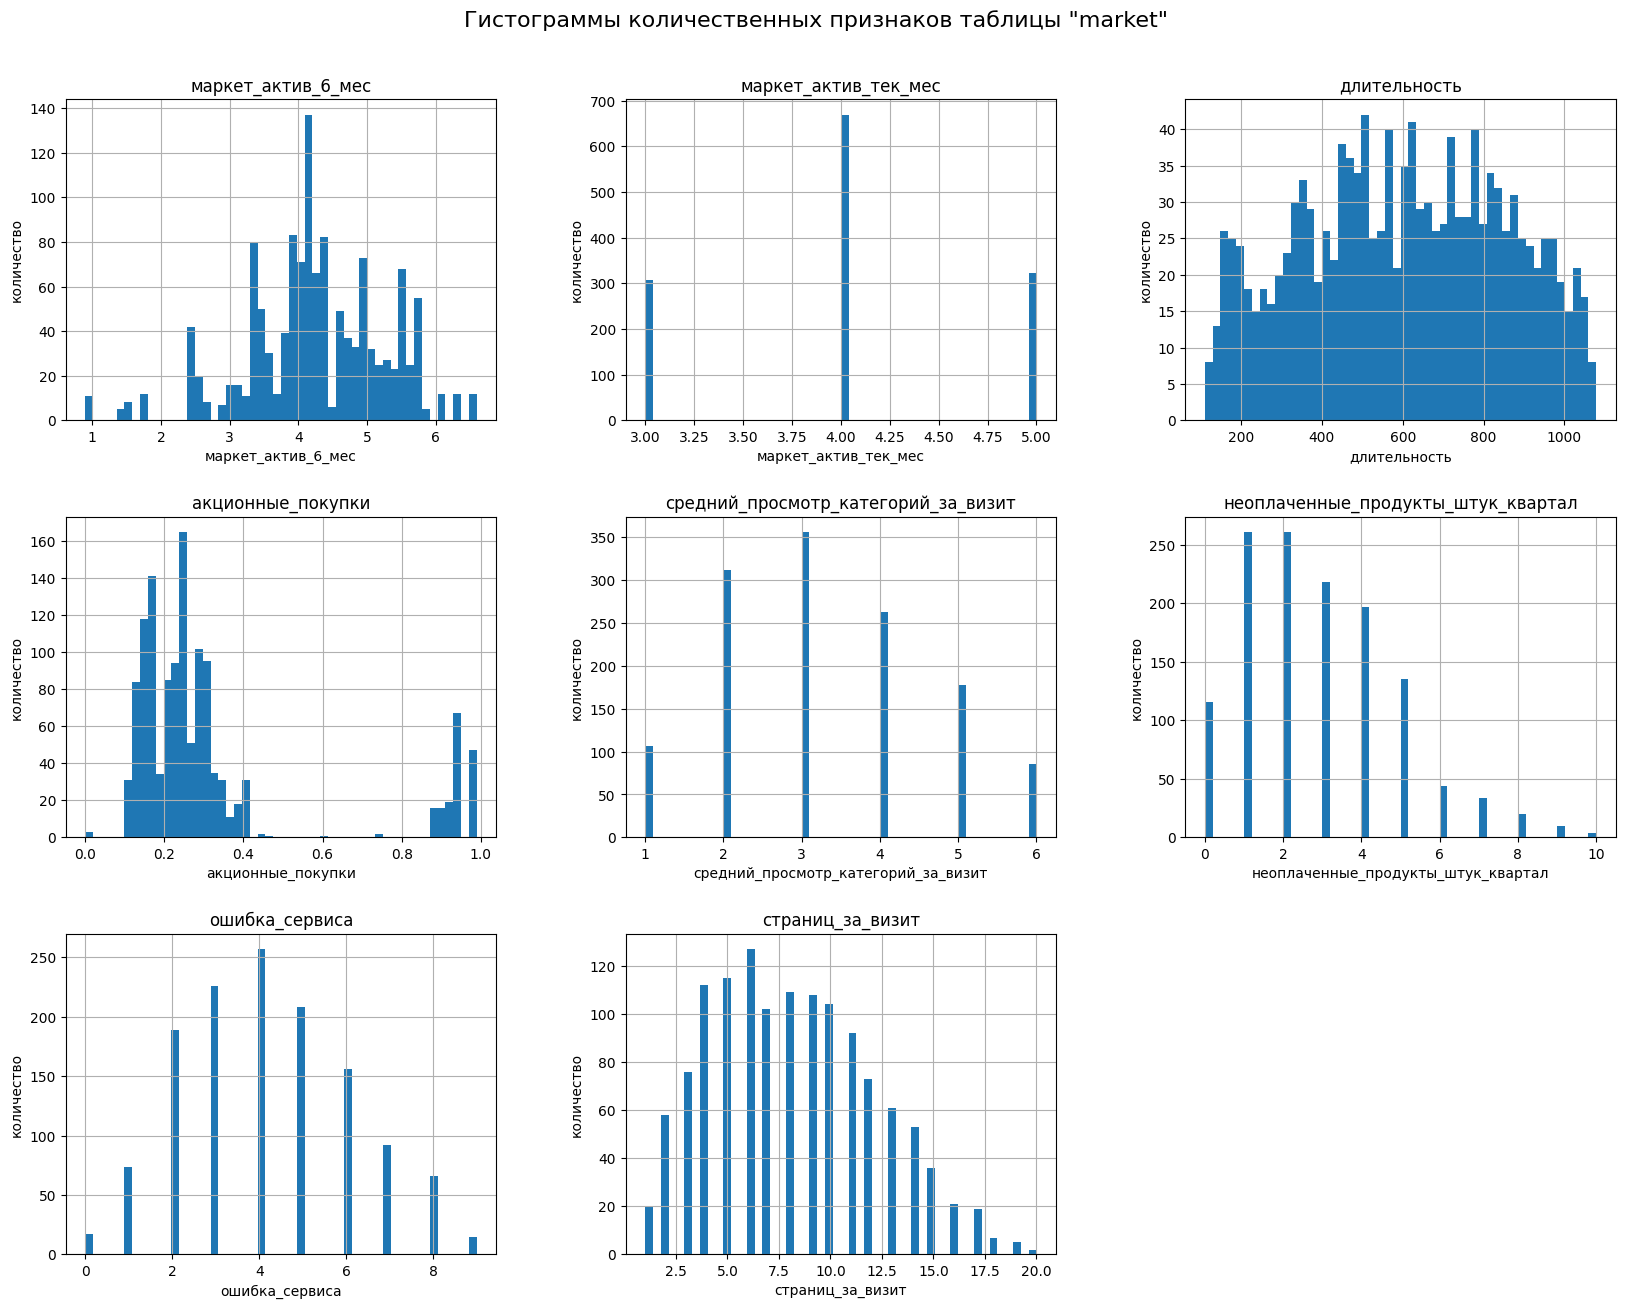

In [654]:
axes = market.iloc[:, 1:].hist(figsize=(20, 15), bins=50)

for ax in axes.flatten():
    ax.set_xlabel(ax.get_title())
    ax.set_ylabel('количество')
    
plt.suptitle('Гистограммы количественных признаков таблицы "market"', fontsize=16, y=0.94)
plt.show()

В среднем за 6 месяцев компания делает по 4 рассылки для каждого пользователя. Есть сегмент клиентов, которые покупают товары по акции. Признак `акционные_покупки` можно преобразовать в бинарный категориальный. 

In [655]:
print('покупательская активность снизилась:', (market.query('акционные_покупки > 0.8 and покупательская_активность == "Снизилась"'))['id'].count())
print('покупательская активность осталась прежней:', (market.query('акционные_покупки > 0.8 and покупательская_активность != "Снизилась"'))['id'].count())

покупательская активность снизилась: 132
покупательская активность осталась прежней: 33


Покупательская активность при аукционной покупке более 0.8 имеет снижение. Следовательно, существуют клиенты, которые любят покупать товары по скидкам. Стоит для данного контингента в рассылке упоминать про текущие скидки и акции. 

#### [Поиск выбросов количественных признаков таблицы 'market'](#task_3_plan_2) <a id='task_3_2'></a>

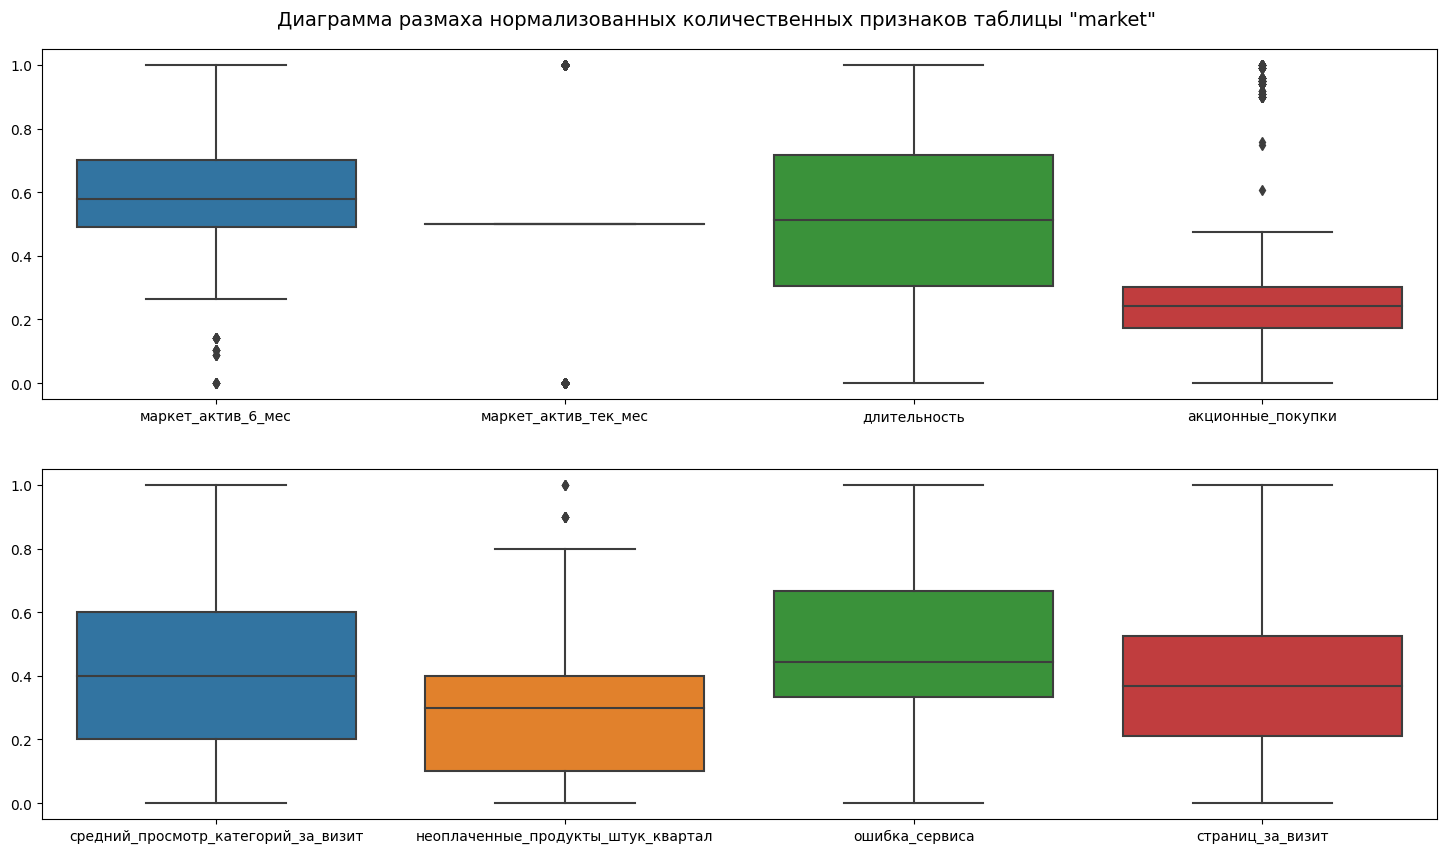

In [656]:
market_num_columns = market.select_dtypes(include='number').columns[1:]
market_num = market[market_num_columns].copy()

for clm in market_num.columns: # Нормализация
    market_num[clm] = (market_num[clm] - market_num[clm].min())/(market_num[clm].max() - market_num[clm].min())
    
plt.figure(figsize=(18, 10))
plt.suptitle('Диаграмма размаха нормализованных количественных признаков таблицы "market"', fontsize=14, y=0.92)

plt.subplot(2, 1, 1)
sns.boxplot(data=market_num.iloc[:, :4], orient='v')
plt.subplot(2, 1, 2)
sns.boxplot(data=market_num.iloc[:, 4:], orient='v')
plt.show()

Диаграмма размаха показала выбросы у `маркет_актив_6_мес`, `акционные_покупки`, `неоплаченные_продукты_штук_квартал`. 

1. `маркет_актив_6_мес` - наблюдаются выбросы в среднем за 6 месяцев до 2 рассылок. Нет необходимости в удалении таких значений. Возможно, клиент попал в базу не в первый месяц, в связи с этим такие низкие значения.
2. `акционные_покупки` - избавиться от 'выбросов' поможет преобразование в бинарный признак. `любитель_акций` с значением 1, где больше 0.5 и 0 - меньше порога.
3. `неоплаченные_продукты_штук_квартал` - ранговый признак, нет необходимости в удалении выбрасов.

#### [Исследовательский анализ категориальных признаков таблицы 'market'](#task_3_plan_3) <a id='task_3_3'></a>

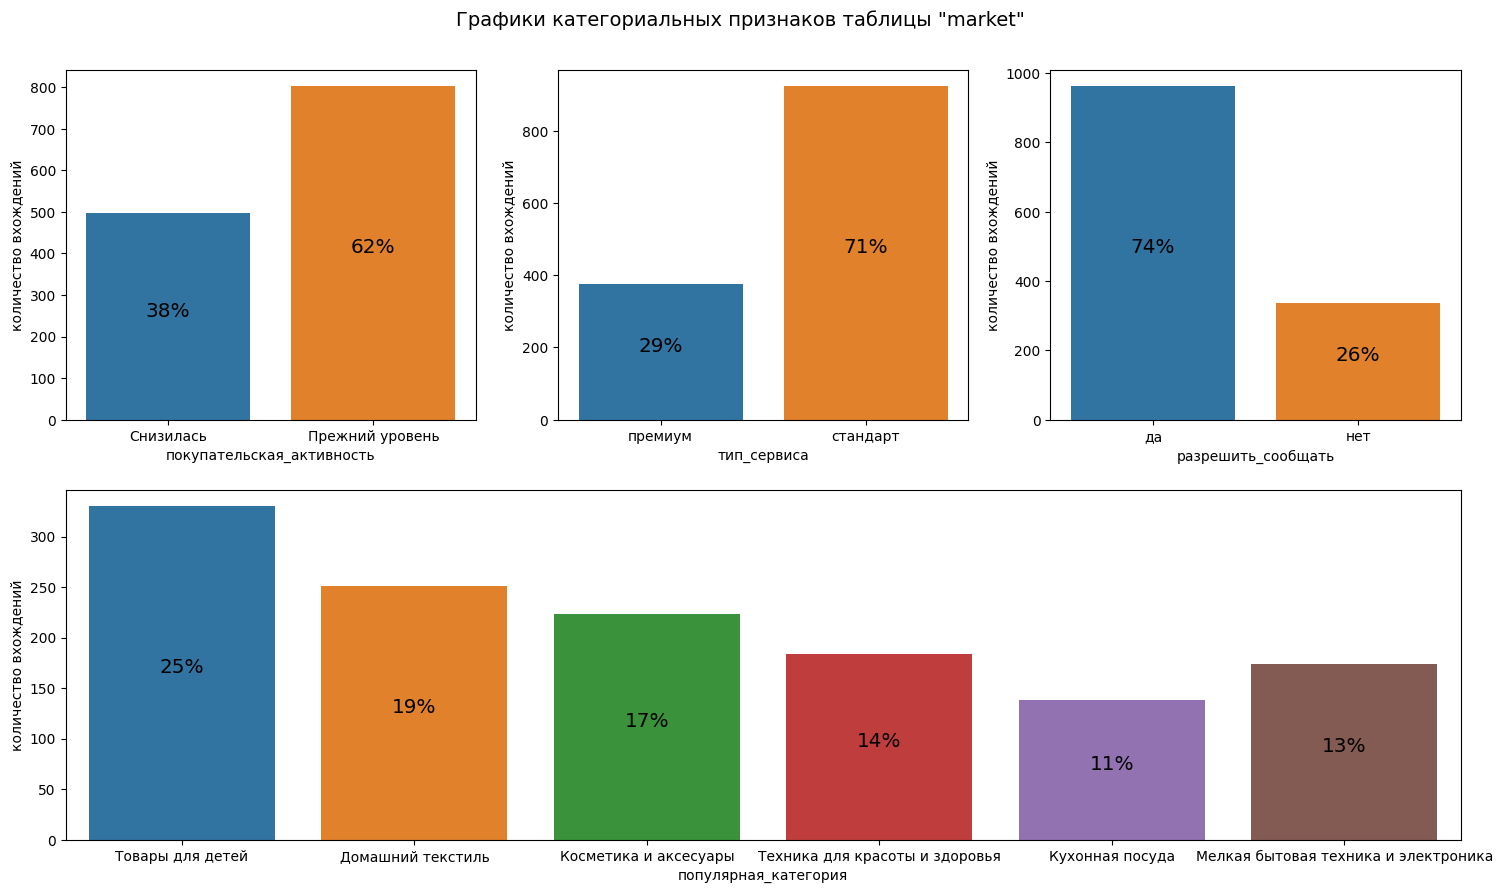

In [657]:
market_category_columns = market.select_dtypes(exclude='number').columns[:-1]
total = market[market_category_columns].shape[0]

fg = plt.figure(figsize=(18, 10))
gs = fg.add_gridspec(2, 3)

plt.suptitle('Графики категориальных признаков таблицы "market"', fontsize=14, y=0.94)

# Отображение графиков с процентами 
for i, n in enumerate(market_category_columns):
    fg.add_subplot(gs[0, i])
    ax = sns.countplot(x=market[market_category_columns].columns[i], data=market)
    # Текстовое поле
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x() + p.get_width() / 2,
                y=height/2,
                s=f'{height/total*100:.0f}%',
                ha="center",
                size='x-large')
    plt.ylabel('количество вхождений')


# популярная_категория в процентах
fg.add_subplot(gs[1, :])
ax = sns.countplot(x='популярная_категория', data=market)
plt.ylabel('количество вхождений')

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2,
            y=height/2,
            s=f'{height/total*100:.0f}%',
            ha="center",
            size='x-large')

Имеется дисбаланс классов целевого признака `покупательская_активность`. Значение 'Прежний_уровень' в 62% наблюдений, 'Снизилась' - в 38%. \
`тип_сервиса` в 29% - 'премиум'. 74% пользователей разрешают присылать дополнительные предложения о товаре. \
Наиболее `популярная_категория` за 6 месяцев - 'Товары для детей' (25%)

#### [Исследовательский анализ признаков таблицы 'market_money'](#task_3_plan_4) <a id='task_3_4'></a>

In [658]:
def get_hist_for_period(df, category):
    plt.figure(figsize=(16, 6))
    period_columns = df['период'].unique()
    for i, type_period in enumerate(period_columns):
        plt.subplot(1,len(period_columns),i+1)
        sns.histplot(df.query('период == @type_period')[category])
        plt.title(type_period)
        plt.ylabel('количество')

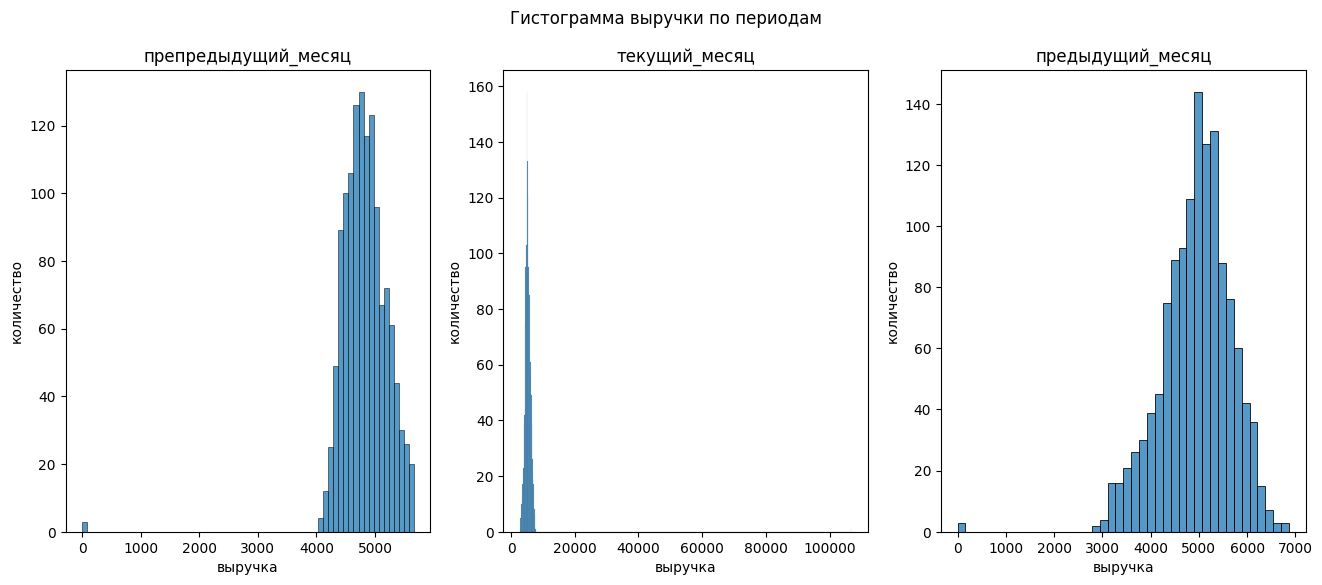

In [659]:
get_hist_for_period(market_money, 'выручка')
plt.suptitle('Гистограмма выручки по периодам');

Наблюдаются аномальные значения в трех категориях.

In [660]:
market_money.query('период == "препредыдущий_месяц" and выручка < 10')

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


С трех пользователей в препредыдущем месяце выручка равна нулю. Предполагаю, что данные пользователи либо не пользовались магазином в этом периоде, либо стали клиентами только в предыдущем/текущем месяце.

In [661]:
market_money.query('период == "предыдущий_месяц" and выручка < 10')

,id,период,выручка
2,215348,предыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0


In [662]:
id_to_del = market_money.query('период == "препредыдущий_месяц" and выручка < 10')['id'].to_list()

market_money = market_money[~(market_money['id'].isin(id_to_del))].reset_index(drop=True)
market = market[~(market['id'].isin(id_to_del))].reset_index(drop=True)
market_time = market_time[~(market_time['id'].isin(id_to_del))].reset_index(drop=True)
money = money[~(money['id'].isin(id_to_del))].reset_index(drop=True)

Данные пользователи присутствуют только в текущем месяце. Так как необходимо отобрать пользователей с покупательской активностью не менее трёх месяцев, они были удалены вовсе из всех таблиц.

In [663]:
display(market_money.query('период == "текущий_месяц" and выручка > 10000'))
print('\nКакую выручку приносил пользователь за 3 месяца:')
display(market_money.query('id == 215380'))

,id,период,выручка
89,215380,текущий_месяц,106862.2



Какую выручку приносил пользователь за 3 месяца:


,id,период,выручка
87,215380,препредыдущий_месяц,5051.0
88,215380,предыдущий_месяц,6077.0
89,215380,текущий_месяц,106862.2


In [664]:
market_money.loc[(market_money['id'] == 215380) & (market_money['период'] == "текущий_месяц"), 'выручка'] = \
    market_money.query('id == 215380 and период != "текущий_месяц"')['выручка'].mean()

Аномальное значение выручки в текущем месяце было заменено на среднее арифметическое по двум предыдущим.

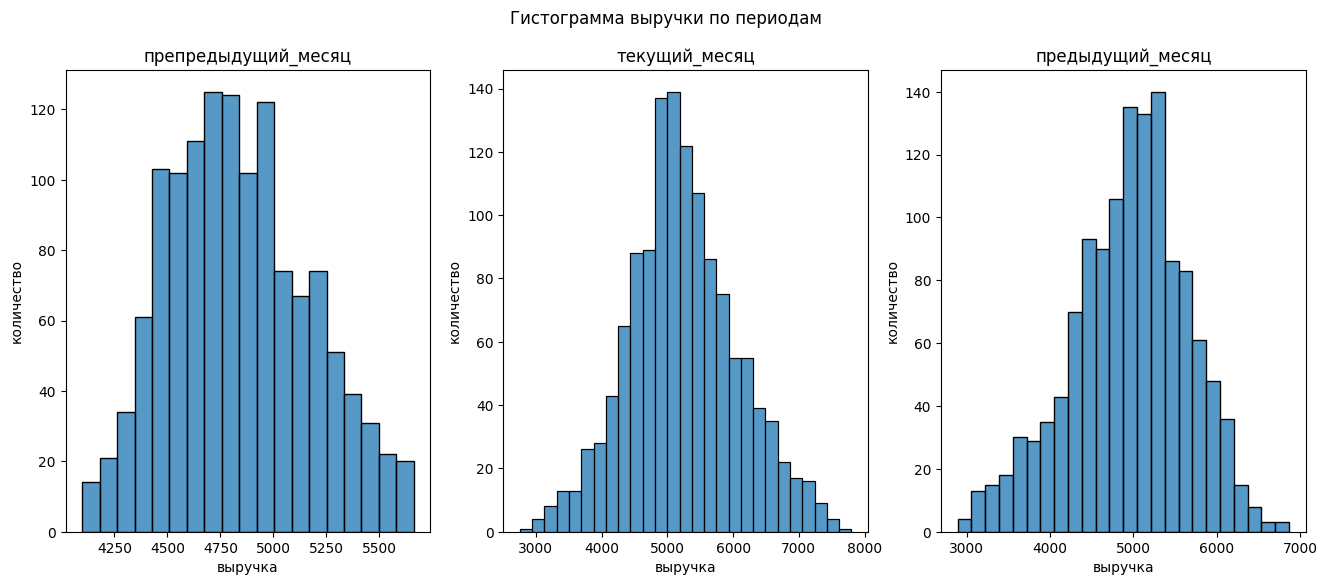

In [665]:
get_hist_for_period(market_money, 'выручка')
plt.suptitle('Гистограмма выручки по периодам');

#### [Исследовательский анализ признаков таблицы 'market_time'](#task_3_plan_5) <a id='task_3_5'></a>

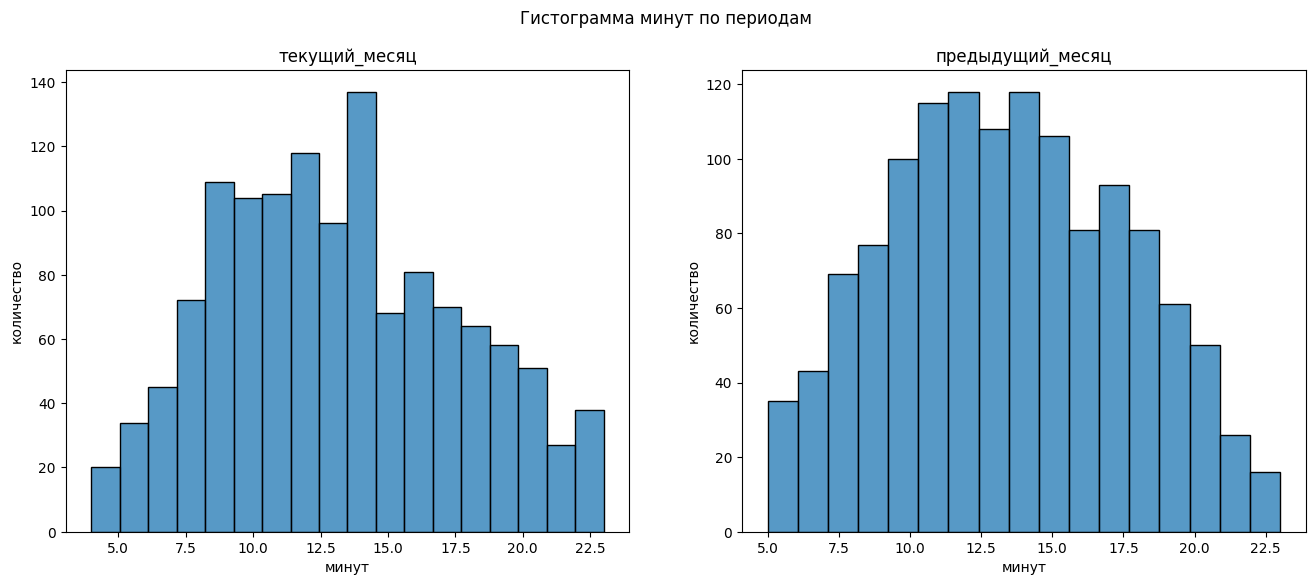

In [666]:
get_hist_for_period(market_time, category='минут')
plt.suptitle('Гистограмма минут по периодам');

Количественные признаки не имеют выбросов. В среднем пользователи проводят на сайте около 13 минут.

#### [Исследовательский анализ признаков таблицы 'money'](#task_3_plan_6) <a id='task_3_6'></a>

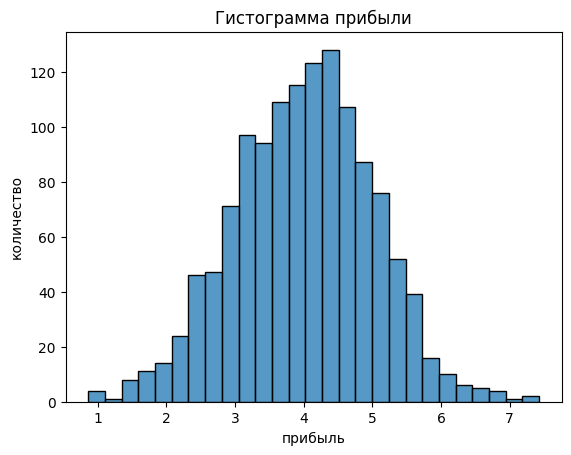

In [680]:
plt.title('Гистограмма прибыли')
sns.histplot(x='прибыль', data=money)
plt.ylabel('количество');

В таблице `money` отсутствуют выбросы.

#### [Отбор клиентов с покупательской активностью не менее трёх месяцев](#task_3_plan_7) <a id='task_3_7'></a>

In [696]:
market_money['id'].value_counts().min()

3

В датасете **`market_money`** все пользователи имеют данные за 3 периода

In [699]:
print('Количество пользователей с покупательской активностью не менее трех месяцев:', market.isin(market_money['id'].unique())['id'].sum())
print('Общее количество пользователей:', market.shape[0])

Количество пользователей с покупательской активностью не менее трех месяцев: 1297
Общее количество пользователей: 1297


В датасете **`market`** все пользователи с покупательской активностью не менее трех месяцев

#### Вывод исследовательского анализа



<font size="2">[вернуться к плану выполнения](#plan_global)</font>